In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
t_s = pd.read_csv('train.csv')
t_s.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


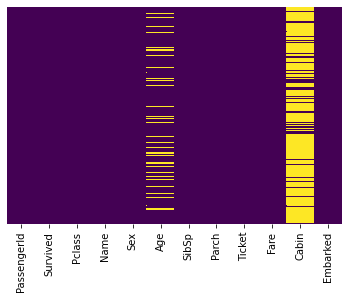

In [3]:
sns.heatmap(t_s.isnull(), cmap = 'viridis', cbar=False, yticklabels=False)

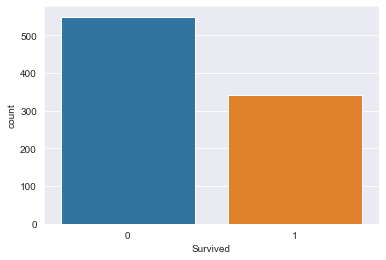

In [5]:
sns.set_style('darkgrid')
sns.countplot(x = 'Survived', data = t_s)

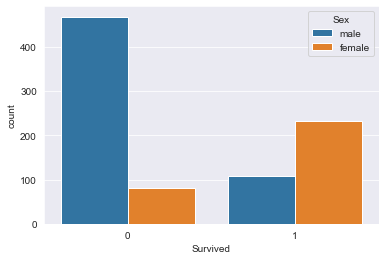

In [6]:
sns.countplot(x = 'Survived', data = t_s, hue = 'Sex')

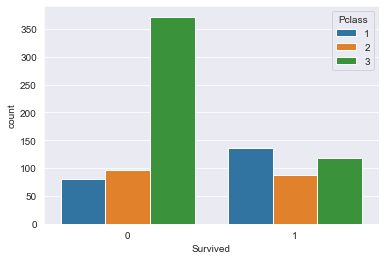

In [7]:
sns.countplot(x = 'Survived', data = t_s, hue = 'Pclass')

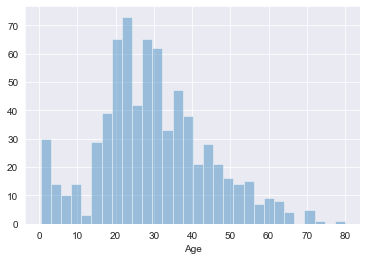

In [8]:
sns.distplot(t_s['Age'].dropna(), kde = False, bins =30)

In [9]:
t_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


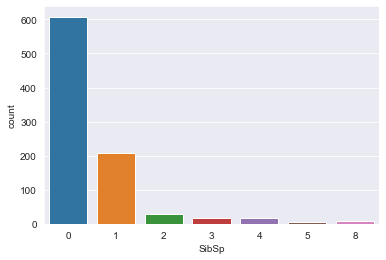

In [10]:
sns.countplot(x = 'SibSp', data =t_s)

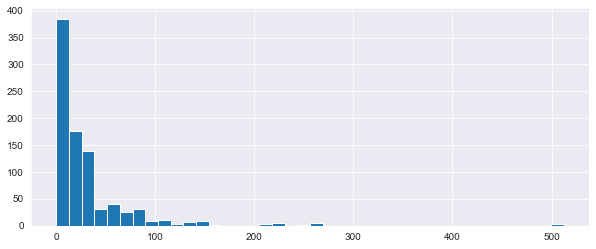

In [11]:
t_s['Fare'].hist(bins = 40 , figsize = [10,4])

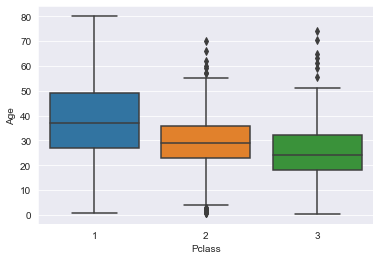

In [12]:
sns.boxplot(x = 'Pclass', y = 'Age' ,data=t_s)

In [13]:
def impute_age(columns):
    Age = columns[0]
    Pclass = columns[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [14]:
t_s['Age'] = t_s[['Age', 'Pclass']].apply(impute_age, axis = 1)

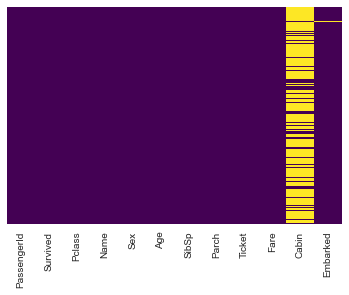

In [15]:
sns.heatmap(t_s.isnull(), cmap = 'viridis', cbar=False, yticklabels=False)

In [16]:
t_s.drop('Cabin', axis =1, inplace = True)

In [17]:
t_s.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


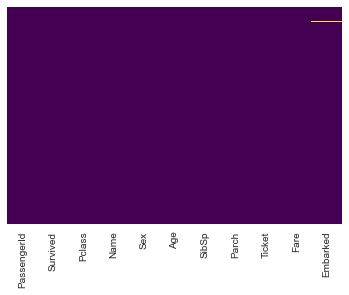

In [18]:
sns.heatmap(t_s.isnull(), cmap = 'viridis', cbar=False, yticklabels=False)

In [19]:
t_s.dropna(inplace = True)

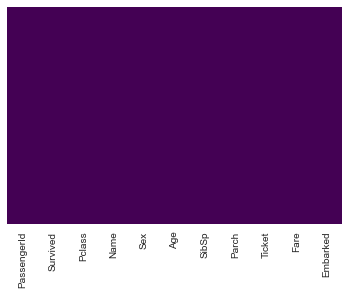

In [20]:
sns.heatmap(t_s.isnull(), cmap = 'viridis', cbar=False, yticklabels=False)

In [21]:
sex = pd.get_dummies(t_s['Sex'], drop_first=True)

In [22]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [23]:
embark = pd.get_dummies(t_s['Embarked'], drop_first=True)

In [24]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [25]:
t_s = pd.concat([t_s,sex,embark], axis = 1)

In [26]:
t_s.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [27]:
t_s.drop(['Sex','Embarked','Ticket','Name'],axis = 1 , inplace = True)

In [28]:
t_s.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [29]:
t_s.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,1,0,1
887,888,1,1,19.0,0,0,30.00,0,0,1
888,889,0,3,24.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


In [30]:
t_s.drop(['PassengerId'],axis = 1 , inplace = True)
t_s.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [31]:
X = t_s.drop('Survived', axis = 1)
y = t_s['Survived']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=333)

In [35]:
lrm = LogisticRegression()
lrm.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
predictions = lrm.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       217
           1       0.74      0.64      0.69       139

    accuracy                           0.77       356
   macro avg       0.76      0.75      0.75       356
weighted avg       0.77      0.77      0.77       356



In [43]:
confusion_matrix(y_test, predictions)


array([[186,  31],
       [ 50,  89]], dtype=int64)